# Problema de Clasificación con Redes Neuronales Artificiales

## Información del dataset y contexto

**Conjunto de datos de calidad del aire para clasificación ADL (*Activities of Daily Living*)**

`Gambi, Ennio (2020), “Air Quality dataset for ADL classification”, Mendeley Data, V1, doi: 10.17632/kn3x9rz3kd.1`

La variación en la concentración de gas interior a lo largo del tiempo se monitorea y los datos se almacenan para usar esta información para evaluar el tipo de actividad realizada en la habitación. Gracias al uso de inteligencia artificial, se evitó un enfoque cuantitativo para determinar la concentración de gas, que habría requerido una cuidadosa calibración de los sensores. El conjunto de datos contiene los valores adquiridos por una matriz de 6 sensores de bajo costo en instantes sucesivos de tiempo, y los valores almacenados están asociados con la acción particular que los generó. A través de un procesamiento de datos apropiado, basado en algoritmos de aprendizaje automático, después de una fase de capacitación inicial, es posible reconocer las acciones que se llevan a cabo dentro del hogar. La presencia de productos químicos en el aire se determina a través de una serie de sensores de gas electroquímicos que se han seleccionado en función de las especificaciones técnicas establecidas sobre la capacidad de detectar clases de compuestos. El conjunto de sensores se puede agrupar en dos categorías principales:
- Sensores MQ ( MQ2, MQ9, MQ135, MQ137, MQ138 ) que tienen gran sensibilidad, baja latencia y bajo costo; cada sensor puede responder a diferentes gases;
- Sensor analógico de gas CO2 ( MG-811 ) que tiene una excelente sensibilidad al dióxido de carbono y apenas se ve afectado por la temperatura y la humedad del aire.

El conjunto de datos contiene 1845 muestras recolectadas que describen 4 situaciones objetivo:

1. Situación normal - Actividad: aire limpio, una persona que duerme o estudia
o descansa - Muestras: 595.
2. Preparación de comidas - Actividades: cocinar carne o pasta, verduras fritas. Una o dos personas en la habitación, circulación de aire forzado - Muestras: 515.
3. Presencia de humo - Actividad: quemar papel y madera por un corto período de tiempo en una habitación con ventanas y puertas cerradas - Muestras: 195.
4. Limpieza - Actividad: uso de detergentes en aerosol y líquidos con amoníaco y / o alcohol. La circulación de aire forzado se puede activar o desactivar - Muestras: 540.

Cada muestra está compuesta por 7 valores; los primeros seis valores son las salidas del sensor, mientras que el último es el índice de la acción que generó los valores adquiridos por los sensores. Las cuatro situaciones diferentes están asociadas con una composición del aire bastante diferente, teniendo en cuenta que cualquier actividad produce sustancias químicas (respiración humana, exhalaciones de procesos metabólicos, liberación de volátiles por combustión y/o oxidación, evaporación de detergentes domésticos, etc.).

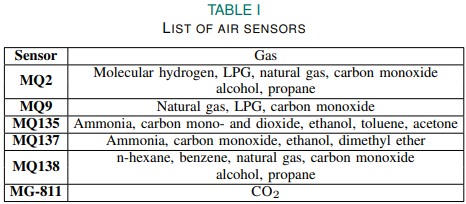

## Librerías Generales

In [ ]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# RNA
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

## Análisis Exploratorio de Datos

In [ ]:
# Dataset desde el repositorio en Drive
!wget -c --no-check-certificate "https://drive.google.com/uc?export=download&id=1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV&confirm=t" -O dataset_ADL_clasificacion.zip

--2023-11-17 20:21:57--  https://drive.google.com/uc?export=download&id=1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV&confirm=t
Resolving drive.google.com (drive.google.com)... 173.194.218.139, 173.194.218.101, 173.194.218.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bssai3h9dpa3kpba8o73b34jsb0kqmsk/1700252475000/12225850433951268217/*/1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV?e=download&uuid=1903b7fb-3340-4e68-87f6-ca853899520a [following]
--2023-11-17 20:21:58--  https://doc-04-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bssai3h9dpa3kpba8o73b34jsb0kqmsk/1700252475000/12225850433951268217/*/1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV?e=download&uuid=1903b7fb-3340-4e68-87f6-ca853899520a
Resolving doc-04-9c-docs.googleusercontent.com (doc-04-9c-docs.googleusercontent.com)... 172.217

In [ ]:
!unzip dataset_ADL_clasificacion.zip

Archive:  dataset_ADL_clasificacion.zip
  inflating: dataset_ADL_clasificacion.csv  


In [ ]:
# Lectura del dataset
dataset = pd.read_csv("dataset_ADL_clasificacion.csv")

In [ ]:
dataset

,MQ2,MQ9,MQ135,MQ137,MQ138,MG-811,Situacion
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4
...,...,...,...,...,...,...,...
1840,862,826,1564,1768,1540,2037,4
1841,917,821,1571,1779,1543,2008,4
1842,925,832,1582,1776,1545,1989,4
1843,928,840,1587,1787,1538,1986,4


In [ ]:
dataset.info()
# No hay valores faltantes, todos son valores enteros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   MQ2        1845 non-null   int64
 1   MQ9        1845 non-null   int64
 2   MQ135      1845 non-null   int64
 3   MQ137      1845 non-null   int64
 4   MQ138      1845 non-null   int64
 5   MG-811     1845 non-null   int64
 6   Situacion  1845 non-null   int64
dtypes: int64(7)
memory usage: 101.0 KB


In [ ]:
dataset.describe()
# Notar que los rangos cambian según el tipo de sensor
# Esto se puede escalar/normalizar

,MQ2,MQ9,MQ135,MQ137,MQ138,MG-811,Situacion
count,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000
mean,587.458537,653.465583,1166.036856,1609.279675,1302.121951,2246.295935,2.368564
std,190.456217,173.360131,208.791130,118.820436,279.456215,181.001073,1.209905
min,263.000000,346.000000,753.000000,1323.000000,773.000000,1797.000000,1.000000
25%,430.000000,517.000000,995.000000,1508.000000,1086.000000,2137.000000,1.000000
50%,551.000000,622.000000,1162.000000,1610.000000,1264.000000,2265.000000,2.000000
75%,713.000000,746.000000,1309.000000,1693.000000,1553.000000,2372.000000,4.000000
max,1266.000000,1388.000000,1738.000000,1926.000000,1948.000000,2703.000000,4.000000


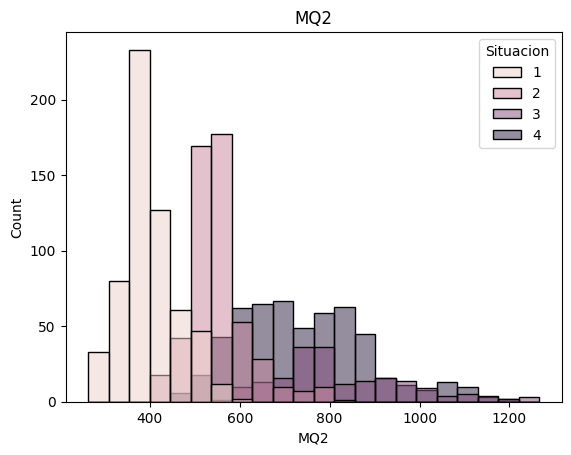

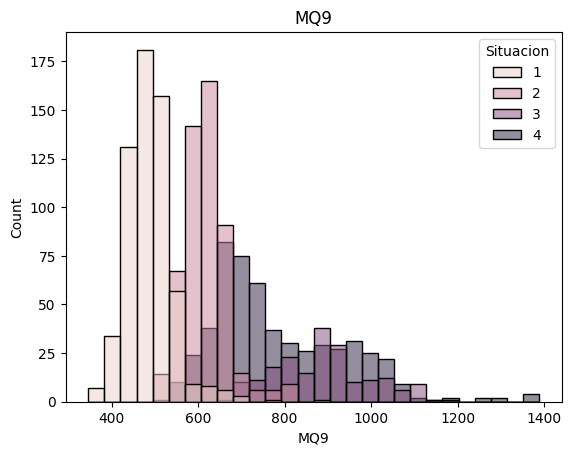

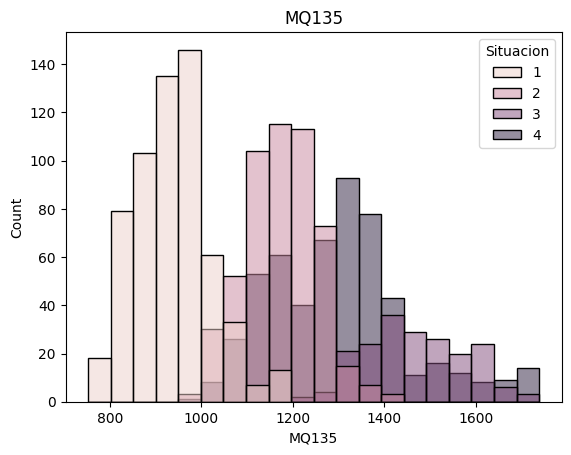

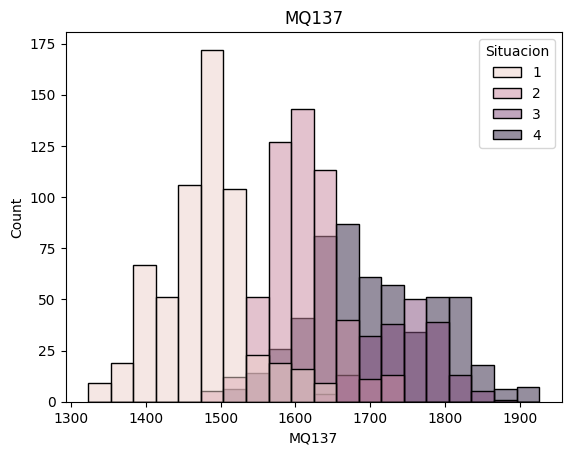

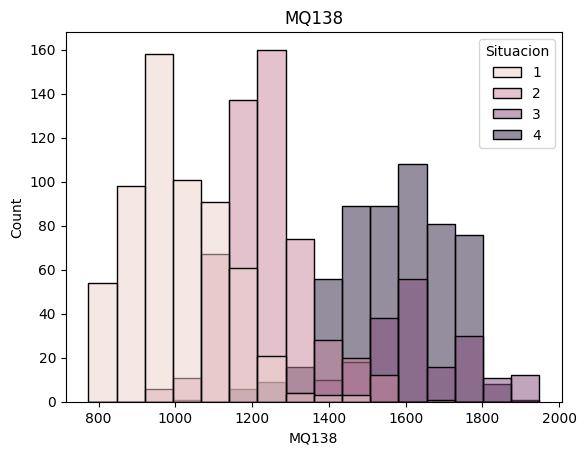

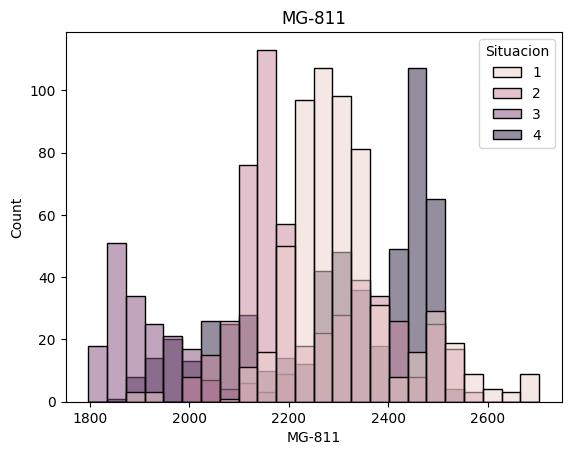

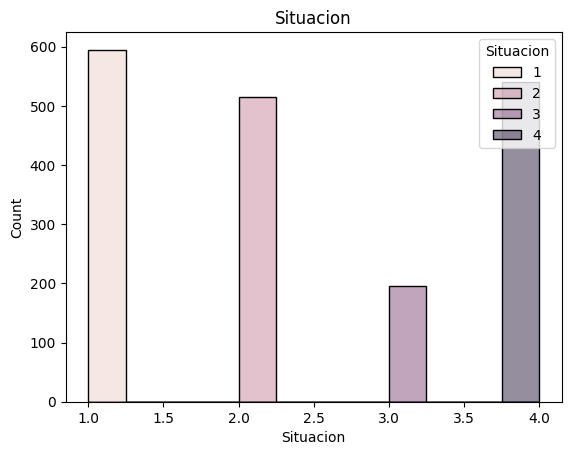

In [ ]:
for col in dataset.columns:
    plt.title(col)
    sns.histplot(data=dataset, x = col, hue='Situacion')
    plt.show()

# A simple vista pareciera que las clases no se separan fácilmente por umbrales en las variables de entrada
# Hay un desbalance en las clases de salida

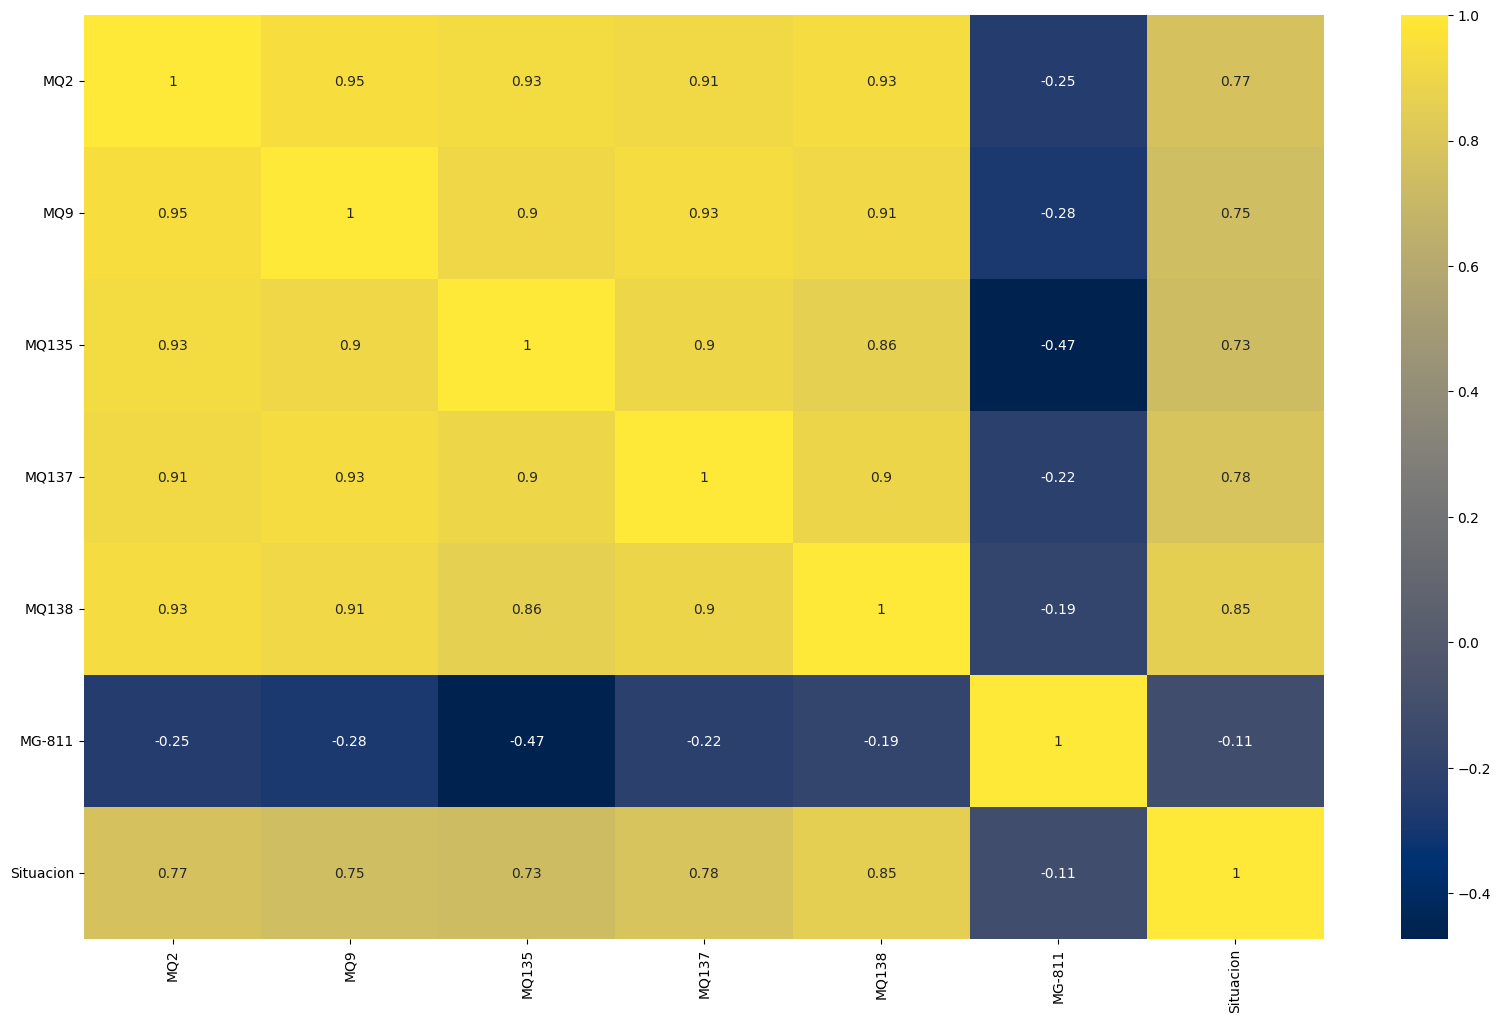

In [ ]:
sns.heatmap(data=dataset.corr(), annot=True, cmap="cividis")  # Con cmap podemos cambiar la paleta de colores para el mapeo en la escala, hay un montón pre-fabricadas

fig=plt.gcf()
fig.set_size_inches(20,12)

plt.show()
# Podemos ver que las variables están bastantes correlacionadas, con esta información podemos tomar decisiones importantes

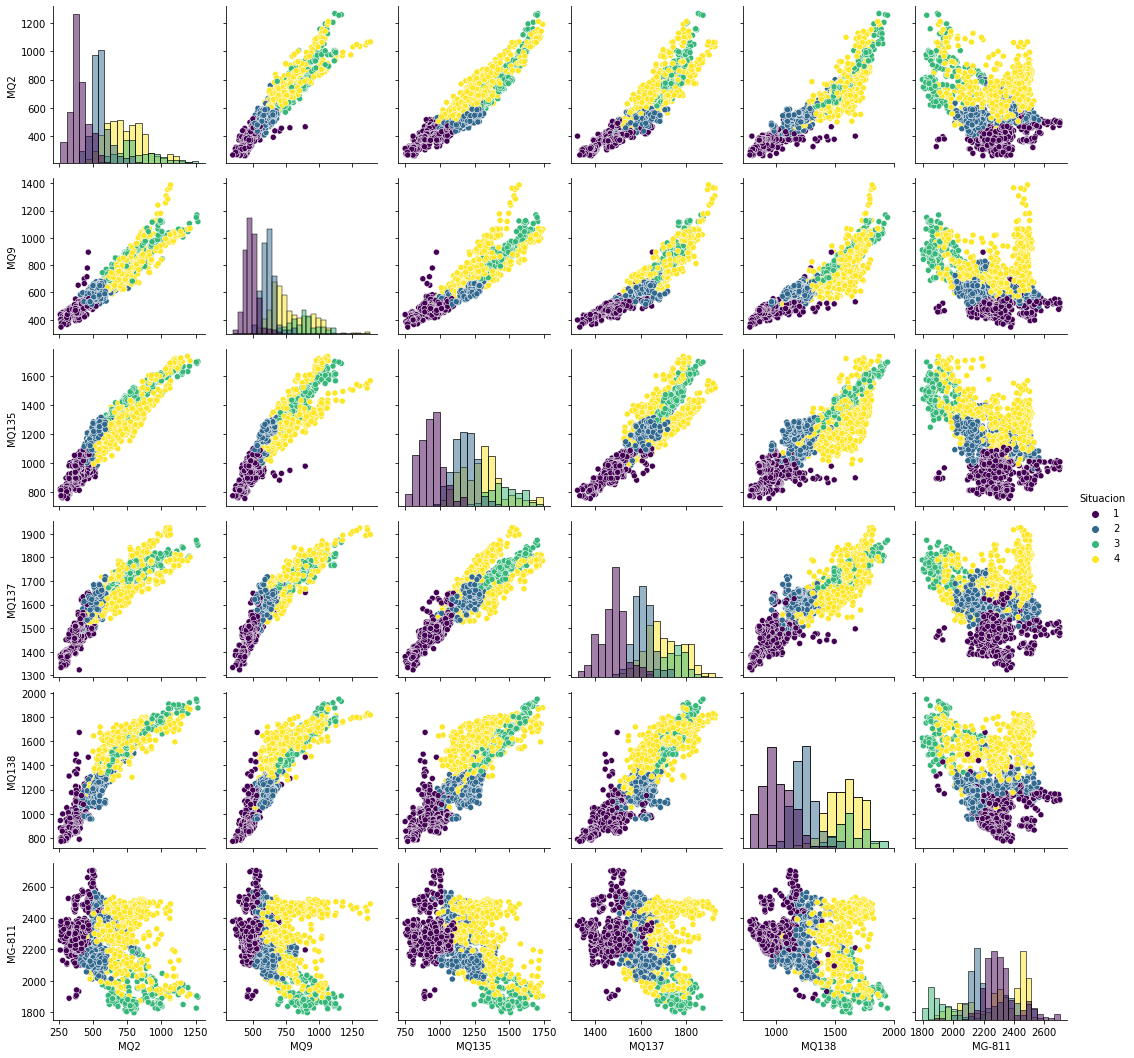

In [ ]:
g = sns.PairGrid(dataset, hue="Situacion", palette='viridis')   # Con palette seteamos paleta de colores también
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
# Acá simplemente graficamos para todas las variables del dataset, podemos sacar mucha información
# Hay 1845 muestras, va a tardar un poco (30 s aprox.), ya se comparan todas las posibidades variable-variable respecto a las salidas

## Preprocesamiento

In [ ]:
# Tratamiento de los datos y división del dataset

# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset['Situacion']
X = dataset.drop('Situacion', axis=1)

# Etapa de normalizado
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X = np.asarray(X)         # Transformación a arreglo de numpy, se puede por hay solamente números. Técnica para mejorar rendimiento en el entrenamiento, normalizado del tipo de datos.
print("Tamaño actual - Entrada:", X.shape) # Es importante que el tamaño sea consistente entre X e Y (Entrada y Salida).

Tamaño actual - Entrada: (1845, 6)


In [ ]:
# Cantidad de datos a procesar.
y = np.asarray(y)
print("Tamaño actual - Salida:", y.shape)

Tamaño actual - Salida: (1845,)


Es muy importante que la cantidad de muestras de entrada sea igual a las de salida, 1845 en este caso.

Aparte de eso, tenemos la configuración para la capa de entrada y salida.
Entran 6 valores por muestra, mientras que sale 1.

Recordar que para la salida... tenemos mapeadas las clases como los valores: 1, 2, 3 o 4. Es decir, un problema de clasificación multiclase.

In [ ]:
# Divisón del dataset, una parte se utiliza para el entrenamiento y la otra para testear los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)
                        # shuffle mezcla el dataset, si miramos el csv... están bastante agrupados por categorías
                        # random_state establece una semilla para el mezclador, así se garantiza repetibilidad
                        # test_size establece el tamaño porcentual para el subset de test

In [ ]:
X.shape

(1845, 6)

In [ ]:
X_train.shape

(1291, 6)

In [ ]:
X.shape[1]

6

## Red Neuronal Sencilla

In [20]:
# Definición del tipo de modelo, capas, tamaños, etc.

"""
Más tipos de capas y funciones de activación en 'layers' de tensorflow
Ej.: from tensorflow.keras.layers import LeakyReLU, PReLU
softmax, softplus, softsign, tanh, selu, elu, exponential...
Cada una tiene sus propios argumentos. Ver ejemplos en: https://keras.io/api/layers/activations/
Para las capas, divertirse con: https://keras.io/api/layers/

Pequeña guía con ejemplos: https://www.tutorialspoint.com/keras/keras_layers.htm
En esta última, se presenta cuestiones como la inicialización personalizada de los pesos,
establecer límites para los mismos, etc.
"""

# Vamos a trabajar con modelos secuenciales únicamente
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(X.shape[1],))) # Es importante el tamaño de la capa de entrada
model.add(layers.Dropout(0.2)) # Es una estrategia para hacer robusto al modelo. Se indica una probabilidad para el apagado aleatorio de las neuronas de la capa.

# --- INICIO CAPAS OCULTAS ---
# Acá entra en juego la creatividad, se pueden agregar tantas capas como se quiera
# La cantidad de neuronas por capa no generará ningún inconveniente en el modelo
# Pueden probar diferentes configuraciones, funciones de activación, etc.
# Charlamos respecto a qué pasa. Abajo vemos entrenamiento, desempeño...
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dropout(0.2))
# --- FIN CAPAS OCULTAS ---

model.add(layers.Dense(5, activation='softmax')) # Es importante el tamaño de la capa de salida, es 4 porque vamos a usar 'sparse_categorical_crossentropy' para la pérdida. Y tenemos 4 categorías o clases para la clasifición.
                                                 # Esto lo que hace, es "automapear" cada clase a una neurona de salida.
                                                 # Erratas, el automapeo necesita que las clases comiencen a enumerarse desde 0. Va con 5 entonces, la salida 0 puede referenciarse a cuando la red no mapea una entrada con ninguna de las clases entrenadas.
                                                 # Si solamente se quieren las 4 clases, habría que mapear las salidas de [1 a 4], a de [0 a 3] inclusive.
# Para visualizar la topología resultante
model.summary()

# Notar que aparece un término como "Non-trainable params". Esto se utiliza por ejemplo, para transferencia de aprendizaje.
# Podemos utilizar un red entrenada para algo parecido a nuestras necesidades, bloqueamos el entrenamiento en ciertas capas, y entrenamos solamente las capas nuevas.
# Es un adelanto simplemente :)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                70        
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dropout_3 (Dropout)         (None, 5)                 0         
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
Total params: 155 (620.00 Byte)
Trainable params: 155 (620.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Se define el optimizador a utilizar, tasa de aprendizaje y otros argumentos a utilizar. Por ej: la métrica de referencia será el accuracy
# Los parámetros del compilador... quedan para otra ocasión.
model.compile(optimizer=optimizers.Adam(learning_rate=2e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Se entrena el modelo y se guardan los resultados. Se define un límite de épocas y el tamaño de lotes a usar.
# El máximo para el lote es la cantidad de datos disponibles, conviene utilizar uno tal que permita un número significativo de mezclas a lo largo de las épocas.
history = model.fit(X_train, y_train, epochs=200, batch_size=50)

Epoch 1/200
26/26 [==============================] - 1s 2ms/step - loss: 1.8001 - accuracy: 0.1611
Epoch 2/200
26/26 [==============================] - 0s 2ms/step - loss: 1.7806 - accuracy: 0.1619
Epoch 3/200
26/26 [==============================] - 0s 2ms/step - loss: 1.7237 - accuracy: 0.1704
Epoch 4/200
26/26 [==============================] - 0s 3ms/step - loss: 1.7078 - accuracy: 0.2169
Epoch 5/200
26/26 [==============================] - 0s 3ms/step - loss: 1.6786 - accuracy: 0.2339
Epoch 6/200
26/26 [==============================] - 0s 2ms/step - loss: 1.6542 - accuracy: 0.2409
Epoch 7/200
26/26 [==============================] - 0s 2ms/step - loss: 1.6412 - accuracy: 0.2696
Epoch 8/200
26/26 [==============================] - 0s 2ms/step - loss: 1.6072 - accuracy: 0.3253
Epoch 9/200
26/26 [==============================] - 0s 2ms/step - loss: 1.5780 - accuracy: 0.3114
Epoch 10/200
26/26 [==============================] - 0s 2ms/step - loss: 1.5773 - accuracy: 0.2990
Epoch 11/

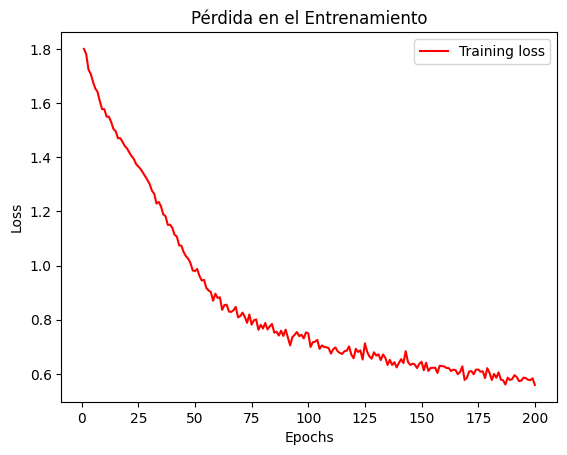

In [22]:
# Una gráfica simple de la evolución de la pérdida durante las épocas que duró el entrenamiento
# De acá se puede extraer mucha información importante respecto a cómo se desempeña la topología establecida. Lo charlamos
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.title('Pérdida en el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

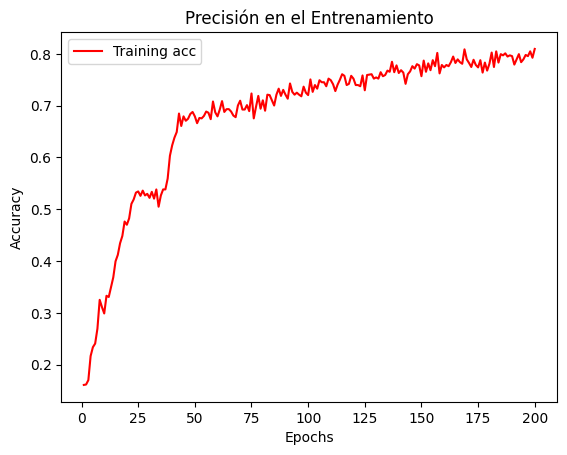

In [23]:
# Ídem, gráfica pero para la precisión de la RNA a lo largo del entrenamiento. Es de esperarse, que con cada época... la precisión aumente
# También se obtiene mucha información respecto a, por ejemplo, si la RNA es capaz de generalizar los datos o simplemente se los memoriza.
# Si más entrenamiento es conveniente o no, entre otros.
plt.clf()
acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.title('Precisión en el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Evaluación del modelo sobre el set para test
# Esos son valores que no se usaron para entrenar. Si, por ejemplo, la red tiene un desempeño muy bueno durante el entrenamiento, pero con datos nuevos es mala...
# Significa que está sobre entrenada, se memorizó los valores. (overfitting)

result = model.evaluate(X_test, y_test) # Devuelve pérdida y accuracy
result

18/18 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8394


[0.4396372139453888, 0.839350163936615]

In [25]:
# Guardo las predicciones del modelos para analizarlas
y_pred = model.predict(X_test)
y_pred

# Las prediciones vienen en listas. Cada fila corresponde a una predicción.
# En cada lista, se tienen las probabilidades de pertenencia a cada clase
# Una forma rápida de determinar a qué clase pertenecen los datos de entrada,
# es seleccionando la clase con mayor probabilidad

18/18 [==============================] - 0s 2ms/step


array([[1.5762281e-04, 1.2211311e-05, 4.3643124e-02, 2.0748472e-01,
        7.4870229e-01],
       [3.4379485e-04, 5.6043864e-05, 8.2907371e-02, 2.4049418e-01,
        6.7619866e-01],
       [1.2978364e-05, 8.7328243e-01, 1.1596330e-01, 3.0668702e-06,
        1.0738228e-02],
       ...,
       [4.5890854e-05, 3.4064717e-06, 3.1471107e-02, 7.2485544e-02,
        8.9599401e-01],
       [7.5833154e-06, 2.6284904e-06, 6.0518339e-02, 7.8003335e-01,
        1.5943812e-01],
       [3.4403964e-04, 1.8849696e-01, 7.4050492e-01, 2.0255728e-03,
        6.8628445e-02]], dtype=float32)

In [26]:
# Pequeña función para evaluar la respuesta y obtener la clase emergente
# En esta función se busca la clase con mayor probabilidad
# Hay métodos hechos que hacen toda esta tarea, pero va a modo demostrativo
# Se puede operar todo según las necesidades a resolver.

def predict_class(y_pred):
    y_class = []
    for i in y_pred:
        y_class.append(int(np.where(i == np.amax(i))[0]))

    return np.array(y_class)

In [27]:
y_pred_class = predict_class(y_pred)
# Ahora se puede comparar directamente y_pred con y_test

In [28]:
y_pred_class

array([4, 4, 1, 2, 2, 1, 4, 3, 1, 1, 4, 1, 1, 1, 4, 1, 3, 1, 2, 2, 4, 4,
       1, 2, 4, 2, 4, 2, 2, 4, 4, 4, 1, 4, 1, 3, 2, 2, 1, 1, 4, 1, 4, 2,
       2, 1, 3, 3, 3, 1, 4, 1, 2, 2, 2, 4, 1, 1, 2, 2, 4, 2, 3, 1, 4, 3,
       2, 1, 1, 4, 1, 4, 2, 1, 1, 2, 4, 2, 2, 1, 1, 4, 4, 3, 3, 1, 1, 1,
       4, 4, 4, 2, 2, 2, 1, 1, 4, 1, 2, 3, 2, 1, 2, 2, 4, 3, 4, 1, 1, 1,
       2, 1, 4, 4, 1, 1, 1, 3, 2, 4, 1, 1, 1, 2, 4, 4, 1, 1, 1, 2, 3, 4,
       2, 1, 4, 3, 3, 4, 2, 2, 4, 1, 2, 2, 4, 3, 2, 4, 2, 1, 1, 2, 3, 4,
       2, 4, 4, 4, 1, 2, 2, 1, 1, 2, 2, 1, 2, 4, 4, 1, 1, 2, 1, 4, 3, 2,
       2, 2, 4, 1, 2, 2, 2, 4, 2, 4, 2, 1, 4, 4, 4, 1, 1, 1, 3, 1, 3, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 4, 1, 2, 4, 2, 1, 1, 2, 1, 3, 2, 4, 3,
       2, 4, 1, 1, 1, 1, 1, 1, 2, 4, 4, 1, 4, 4, 2, 1, 4, 2, 1, 1, 2, 1,
       4, 1, 1, 1, 2, 1, 1, 4, 4, 3, 4, 2, 1, 3, 2, 2, 4, 1, 3, 1, 4, 2,
       1, 4, 3, 1, 1, 4, 2, 1, 4, 2, 2, 4, 3, 1, 4, 2, 1, 4, 1, 1, 3, 4,
       2, 4, 4, 1, 4, 3, 4, 1, 2, 1, 3, 4, 3, 2, 2,

In [29]:
y_test

array([3, 2, 1, 2, 4, 1, 3, 4, 1, 2, 4, 1, 1, 1, 2, 1, 4, 1, 2, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 2, 3, 4, 2, 1, 1, 4, 1, 4, 2,
       2, 1, 3, 3, 3, 1, 4, 2, 2, 2, 2, 4, 1, 1, 2, 2, 4, 2, 4, 1, 4, 4,
       2, 1, 2, 4, 1, 4, 2, 2, 1, 2, 2, 2, 2, 1, 1, 4, 4, 4, 3, 1, 1, 1,
       4, 4, 4, 2, 4, 2, 1, 1, 4, 1, 2, 3, 2, 1, 1, 2, 4, 3, 4, 1, 1, 1,
       2, 1, 4, 4, 1, 1, 1, 4, 2, 4, 1, 1, 1, 2, 4, 4, 1, 1, 1, 4, 4, 4,
       2, 1, 4, 3, 3, 4, 2, 2, 4, 1, 2, 2, 4, 3, 2, 4, 2, 1, 1, 2, 3, 4,
       2, 4, 4, 4, 1, 2, 2, 1, 1, 2, 2, 1, 2, 4, 2, 1, 1, 2, 1, 4, 3, 4,
       2, 2, 4, 1, 4, 2, 2, 4, 2, 4, 4, 1, 4, 4, 4, 1, 1, 1, 3, 1, 4, 1,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 4, 1, 2, 4, 2, 1, 1, 2, 1, 3, 2, 2, 4,
       2, 4, 1, 2, 1, 1, 1, 1, 2, 4, 4, 1, 4, 4, 4, 1, 4, 2, 1, 1, 2, 1,
       4, 1, 1, 1, 2, 1, 1, 4, 4, 4, 4, 2, 1, 3, 2, 2, 4, 1, 3, 1, 4, 2,
       1, 2, 3, 1, 1, 4, 2, 1, 4, 4, 2, 4, 4, 1, 4, 2, 1, 4, 1, 1, 3, 4,
       2, 4, 4, 1, 4, 4, 4, 1, 2, 1, 3, 4, 3, 2, 4,

In [30]:
# Si hay pocos datos, es fácil comparar visualmente
# Pero no es normal hacerlo así. Se utilizan herramientas y/o métricas
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.90      0.96      0.93       179
           2       0.85      0.78      0.82       157
           3       0.64      0.84      0.73        51
           4       0.84      0.77      0.80       167

    accuracy                           0.84       554
   macro avg       0.81      0.84      0.82       554
weighted avg       0.84      0.84      0.84       554



In [31]:
# Visualización de los resultados utilizando la matriz de confusión
# Lo ideal es que hayan valores únicamente en la diagonal principal de la matriz
# Significa que... la RNA clasificó correctamente cada observación. Charlamos sobre esto un poco.
confusion_matrix(y_test, y_pred_class)

array([[171,   6,   0,   2],
       [ 18, 123,   1,  15],
       [  0,   0,  43,   8],
       [  1,  15,  23, 128]])

In [32]:
# Función para graficar como imagen la matriz de confusión
def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

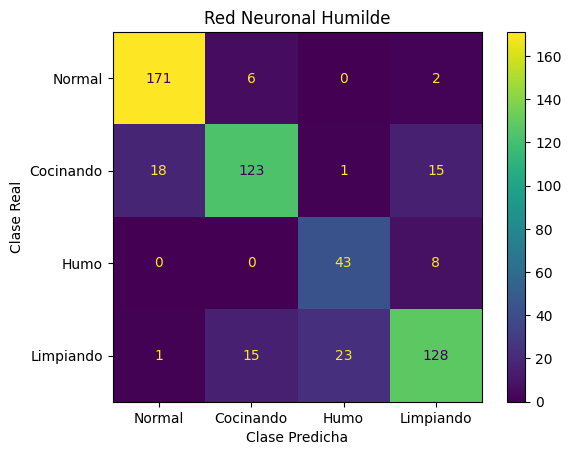

In [33]:
plot_confusion_matrix(y_test, y_pred_class, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Red Neuronal Humilde")

## Red Neuronal V2

In [34]:
model_v2 = models.Sequential()
model_v2.add(layers.Dense(4, activation='relu', input_shape=(X.shape[1],))) # Sigue siendo importante el tamaño de la capa de entrada
model_v2.add(layers.Dropout(0.2))
model_v2.add(layers.Dense(4, activation='relu'))
model_v2.add(layers.Dropout(0.2))
model_v2.add(layers.Dense(8, activation='relu'))
model_v2.add(layers.Dropout(0.2))
model_v2.add(layers.Dense(16, activation='relu'))
model_v2.add(layers.Dropout(0.2))
model_v2.add(layers.Dense(8, activation='relu'))
model_v2.add(layers.Dropout(0.2))
model_v2.add(layers.Dense(4, activation='relu'))
model_v2.add(layers.Dropout(0.2))
model_v2.add(layers.Dense(5, activation='softmax')) # Sigue siendo importante el tamaño de la capa de salida

# ¿RNA más grande significa mejor desempeño?

In [35]:
# Para visualizar la topología resultante
model_v2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 28        
                                                                 
 dropout_4 (Dropout)         (None, 4)                 0         
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dropout_5 (Dropout)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 8)                 40        
                                                                 
 dropout_6 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 16)               

In [36]:
# El compilador lo dejamos igual
model_v2.compile(optimizer=optimizers.Adam(learning_rate=2e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history_v2 = model_v2.fit(X_train, y_train, epochs=200, batch_size=20)

Epoch 1/200
65/65 [==============================] - 2s 4ms/step - loss: 1.6128 - accuracy: 0.2595
Epoch 2/200
65/65 [==============================] - 0s 4ms/step - loss: 1.5947 - accuracy: 0.2920
Epoch 3/200
65/65 [==============================] - 0s 3ms/step - loss: 1.5772 - accuracy: 0.3075
Epoch 4/200
65/65 [==============================] - 0s 3ms/step - loss: 1.5527 - accuracy: 0.3122
Epoch 5/200
65/65 [==============================] - 0s 3ms/step - loss: 1.5281 - accuracy: 0.3153
Epoch 6/200
65/65 [==============================] - 0s 3ms/step - loss: 1.4943 - accuracy: 0.3222
Epoch 7/200
65/65 [==============================] - 0s 5ms/step - loss: 1.4780 - accuracy: 0.3191
Epoch 8/200
65/65 [==============================] - 0s 6ms/step - loss: 1.4523 - accuracy: 0.3098
Epoch 9/200
65/65 [==============================] - 0s 5ms/step - loss: 1.4110 - accuracy: 0.3176
Epoch 10/200
65/65 [==============================] - 0s 5ms/step - loss: 1.3830 - accuracy: 0.3253
Epoch 11/

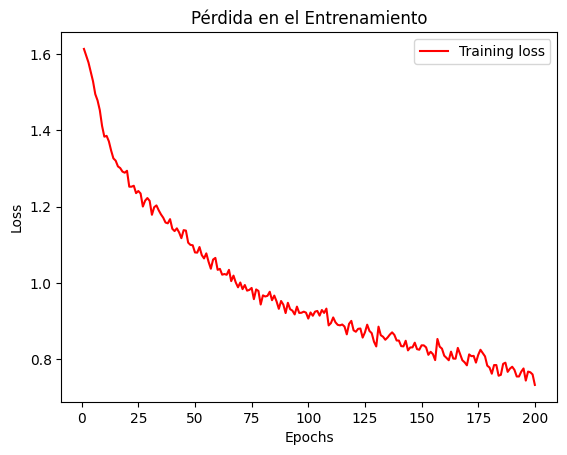

In [38]:
history_dict = history_v2.history
loss_values = history_dict['loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.title('Pérdida en el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

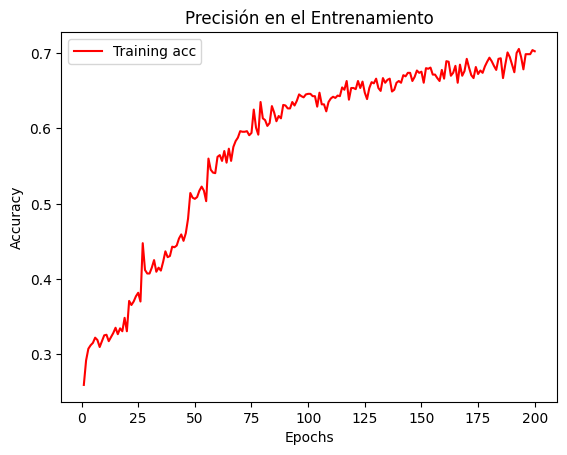

In [39]:
plt.clf()
acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.title('Precisión en el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
result = model_v2.evaluate(X_test, y_test) # Devuelve pérdida y accuracy
result

18/18 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.7780


[0.6697471141815186, 0.7779783606529236]

In [41]:
y_pred = model_v2.predict(X_test)
y_pred_class = predict_class(y_pred)
print(classification_report(y_test, y_pred_class))

18/18 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           1       0.95      0.87      0.91       179
           2       0.81      0.73      0.77       157
           3       0.00      0.00      0.00        51
           4       0.65      0.96      0.77       167

    accuracy                           0.78       554
   macro avg       0.60      0.64      0.61       554
weighted avg       0.73      0.78      0.74       554



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


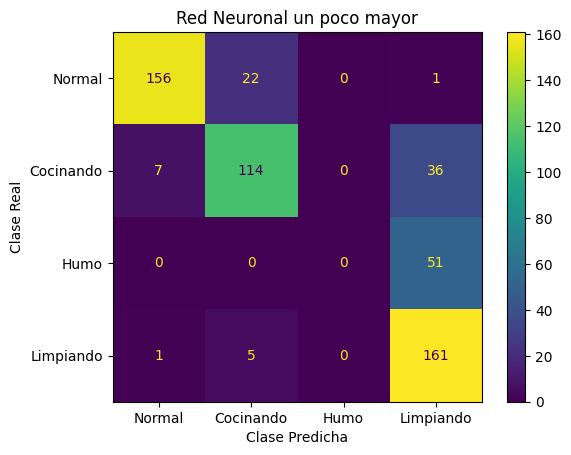

In [42]:
plot_confusion_matrix(y_test, y_pred_class, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Red Neuronal un poco mayor")

**¿RNA más grande significa mejor desempeño?**

## Red Neuronal V3

In [43]:
# División del dataset (igual que el anterior, cambian proporciones)
# Ahora llamamos "validación" a la otra parte de la subdivisión. Pero es lo mismo
# Esta vez vamos a usar en cada época una porción de datos para verificar de otra manera el desempeño
# Después... hacemos test con datos que la red nunca vio
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [44]:
# Cantidades de observaciones en cada subset
print("Entrenamiento: ", X_train.shape)
print("Validación: ", X_val.shape)
print("Test: ", X_test.shape)

Entrenamiento:  (903, 6)
Validación:  (388, 6)
Test:  (554, 6)


In [45]:
model_v3 = models.Sequential()
model_v3.add(layers.Dense(8, activation='relu', input_shape=(X.shape[1],))) # Sigue siendo importante el tamaño de la capa de entrada
model_v3.add(layers.Dropout(0.2))
model_v3.add(layers.Dense(16, activation='relu'))
model_v3.add(layers.Dropout(0.2))
model_v3.add(layers.Dense(8, activation='relu'))
model_v3.add(layers.Dropout(0.2))
model_v3.add(layers.Dense(5, activation='softmax')) # Sigue siendo importante el tamaño de la capa de salida

model_v3.compile(optimizer=optimizers.Adam(learning_rate=2e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_v3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 56        
                                                                 
 dropout_10 (Dropout)        (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 16)                144       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dropout_12 (Dropout)        (None, 8)                 0         
                                                                 
 dense_16 (Dense)            (None, 5)                

In [46]:
# Criterio de parada anticipada, si probaste una topología grande... se podrá intuir para qué sirve esto
# monitor: variable que "mira" para decidir si hay que terminar antes el entrenamiento
# min_delta: sensibilidad admitida / resolución
# patience: cantidad de épocas que espera en búsqueda de alguna mejora
# restore_best_weights: si está en True, recupera los mejores pesos encontrados
# verbose: para mostrar diferentes niveles de mensajes. En 0 no avisa nada, en 1 avisa que se paró por los criterios establecidos, etc
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=20, restore_best_weights=True, verbose = 1)

# Para el entrenamiento, usamos otros datos para la validación del modelo.
# En el historial se guardan la información para el proceso con datos de validación
history_v3 = model_v3.fit(X_train, y_train, epochs=800, batch_size=30, validation_data=(X_val, y_val), callbacks=early_stopping)

Epoch 1/800
31/31 [==============================] - 1s 16ms/step - loss: 1.5810 - accuracy: 0.2337 - val_loss: 1.5417 - val_accuracy: 0.4562
Epoch 2/800
31/31 [==============================] - 0s 7ms/step - loss: 1.5625 - accuracy: 0.2824 - val_loss: 1.5082 - val_accuracy: 0.5129
Epoch 3/800
31/31 [==============================] - 0s 14ms/step - loss: 1.5295 - accuracy: 0.3223 - val_loss: 1.4775 - val_accuracy: 0.5284
Epoch 4/800
31/31 [==============================] - 0s 9ms/step - loss: 1.5074 - accuracy: 0.3931 - val_loss: 1.4474 - val_accuracy: 0.5335
Epoch 5/800
31/31 [==============================] - 0s 11ms/step - loss: 1.4812 - accuracy: 0.3643 - val_loss: 1.4173 - val_accuracy: 0.5335
Epoch 6/800
31/31 [==============================] - 0s 16ms/step - loss: 1.4522 - accuracy: 0.4031 - val_loss: 1.3834 - val_accuracy: 0.5361
Epoch 7/800
31/31 [==============================] - 0s 16ms/step - loss: 1.4294 - accuracy: 0.4064 - val_loss: 1.3477 - val_accuracy: 0.5412
Epoch 8/

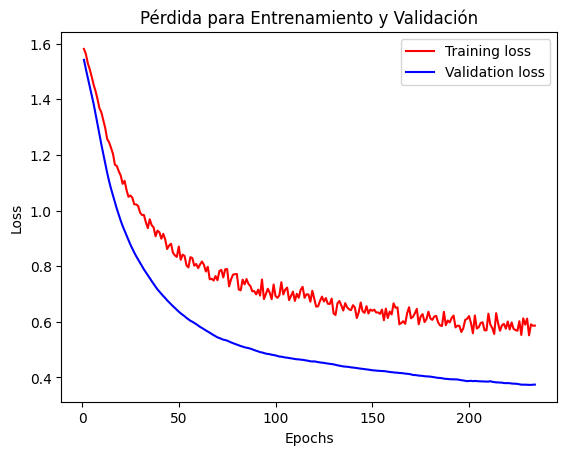

In [47]:
# Notar que el entrenamiento anterior finaliza antes de las épocas totales establecidas para el fit, justamente por el nuevo criterio de parada
# Entrena hasta que se cumpla algún criterio
# En este caso, se entrenó hasta una determinada pérdida en el set de validación. Es de esperarse, que sobre un set de test se obtenga un resultado muy parecido.

# Ahora se disponen de los datos para el set de validación
history_dict = history_v3.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Pérdida para Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

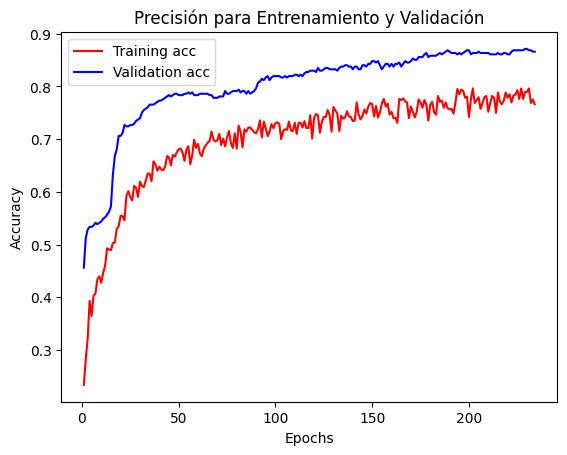

In [48]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Precisión para Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# De estas curvas se pueden obtener varias conclusiones respecto a la red.
# En principio, deben ser bastante parecidas tanto train como val, reflejando el aprendizaje de la RNA
# El desempeño sobre val suele ser menor, son datos no utilizados para el entrenamiento (de forma directa)
# Si en val se obtienen cosas muy diferentes (respecto a train), al realizar predicciones sobre el set para test va a pasar algo muy parecido (a lo que pasó con val)
# Muy resumido todo, cada cuestión tiene de fondo un análisis extensivo.

Finalmente, evaluación sobre el set de test:

In [49]:
result = model_v3.evaluate(X_test, y_test) # Devuelve pérdida y accuracy
# Deberían ser muy parecidos al de validación, si no nos pasamos con entrenamiento.
result

18/18 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8357


[0.4468817412853241, 0.8357400894165039]

In [50]:
y_pred = model_v3.predict(X_test)
y_pred_class = predict_class(y_pred)
print(classification_report(y_test, y_pred_class))

18/18 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           1       0.93      0.93      0.93       179
           2       0.86      0.78      0.82       157
           3       0.73      0.53      0.61        51
           4       0.76      0.89      0.82       167

    accuracy                           0.84       554
   macro avg       0.82      0.78      0.79       554
weighted avg       0.84      0.84      0.83       554



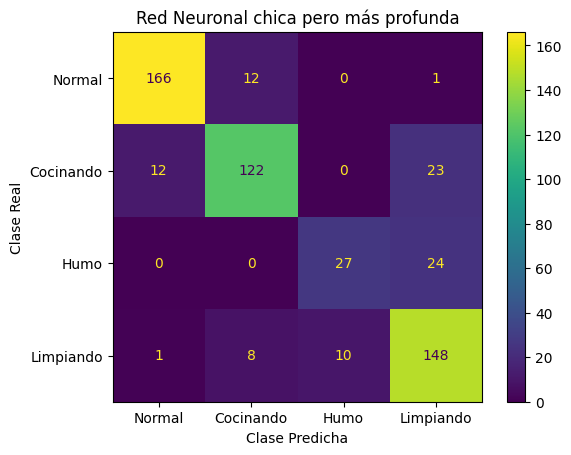

In [51]:
plot_confusion_matrix(y_test, y_pred_class, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Red Neuronal chica pero más profunda")

# Comparación de mi RNA vs Clasificadores clásicos

In [ ]:
# Otra librería que prueba modelos de forma automática
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_val, y_train, y_val)
models

 76%|███████▌  | 22/29 [00:01<00:00, 14.95it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 903, number of used features: 6
[LightGBM] [Info] Start training from score -1.170933
[LightGBM] [Info] Start training from score -1.280270
[LightGBM] [Info] Start training from score -2.151762
[LightGBM] [Info] Start training from score -1.218474
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

100%|██████████| 29/29 [00:01<00:00, 14.69it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.98,0.98,None,0.98,0.06
LabelSpreading,0.98,0.98,None,0.98,0.08
ExtraTreesClassifier,0.96,0.96,None,0.96,0.17
KNeighborsClassifier,0.96,0.95,None,0.96,0.03
LGBMClassifier,0.95,0.94,None,0.95,0.39
RandomForestClassifier,0.95,0.94,None,0.95,0.27
QuadraticDiscriminantAnalysis,0.94,0.93,None,0.94,0.03
DecisionTreeClassifier,0.92,0.92,None,0.92,0.01
BaggingClassifier,0.93,0.92,None,0.93,0.05


**¿Cuándo vale la pena armar una topología manual?**

# Optimizadores Actuales

## Discusión de los principales optimizadores disponibles en keras

[Ref.](https://velascoluis.medium.com/optimizadores-en-redes-neuronales-profundas-un-enfoque-pr%C3%A1ctico-819b39a3eb5)

### Stochastic Gradient Descent (SGD)

El cálculo de la derivada parcial de la función de coste respecto a cada uno de los pesos de la red para cada observación es, dado el número de diferentes pesos y observaciones, inviable. Por lo tanto, una primera optimización consiste en la introducción de un comportamiento estocástico (aleatorio). SGD hace algo tan simple cómo limitar el cálculo de la derivada a tan solo una observación (por batch). Existen algunas variaciones basadas por ejemplo en seleccionar varias observaciones en vez de una (mini-batch SGD).

Una variación particularmente interesante es la introducción de momentum. De forma intuitiva, el momentum acelera el descenso en direcciones similares a las anteriores. Para ello, vamos a guardar un vector que representa la media en ventana de los anteriores vectores de descenso, y si el nuevo vector es similar al vector de momentum aceleramos su descenso.

Otra variación se basa en el optimizador de gradiente acelerado de Nesterov. Para el cálculo del descenso, en un primer momento “confiamos” en el vector de momentum y una vez descendido en su dirección computamos el nuevo gradiente desde ese punto.

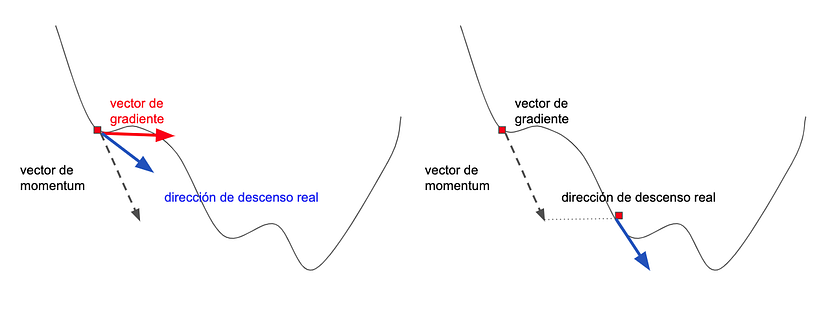

### Adaptive Gradient Algorithm (AdaGrad)

El algoritmo AdaGrad introduce una variación muy interesante en el concepto de factor de entrenamiento: en vez de considerar un valor uniforme para todos los pesos, se mantiene un factor de entrenamiento específico para cada uno de ellos. Sería inviable calcular este valor de forma específica así que, partiendo del factor de entrenamiento inicial, AdaGrad lo escala y adapta para cada dimensión con respecto al gradiente acumulado en cada iteración.

### Adadelta

Adadelta es una variación de AdaGrad en la que en vez de calcular el escalado del factor de entrenamiento de cada dimensión teniendo en cuenta el gradiente acumulado desde el principio de la ejecución, se restringe a una ventana de tamaño fijo de los últimos n gradientes.

### RMSprop (Root Mean Square Propagation)

RMSProp es un algoritmo similar. También mantiene un factor de entrenamiento diferente para cada dimensión, pero en este caso el escalado del factor de entrenamiento se realiza dividiéndolo por la media del declive exponencial del cuadrado de los gradientes.

### Adam (Adaptive moment estimation)

El algoritmo Adam combina las bondades de AdaGrad y RMSProp. Se mantiene un factor de entrenamiento por parámetro y además de calcular RMSProp, cada factor de entrenamiento también se ve afectado por la media del momentum del gradiente.

`Como se acaba de comprobar, los algoritmos mas recientes como Adam, están construidos en base a sus predecesores, por tanto podremos esperar que su rendimiento sea superior.`

Salvando SGD, es complicado tener una visión intuitiva del comportamiento de cada uno de los optimizadores; por ello es útil visualizar su rendimiento en diferentes funciones de coste. Estas visualizaciones son bastante reveladoras.

**Función de coste con valle profundo**: los algoritmos que escalan el tamaño del paso basados en el gradiente convergen. Resulta interesante que SGD nunca desciende en la dirección adecuada.

In [ ]:
#@markdown
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:786/0*ezD25nEdVBJAeVfA')

**Función de coste en siguiendo el patrón Beale**: debido a lo pronunciado del gradiente en los contornos, los algoritmos acelerados divergen, resultandoles difícil “frenar”.

In [ ]:
#@markdown
Image(url='https://miro.medium.com/v2/resize:fit:786/0*-Vu1u-0JFiKYkpOa')

**Función de coste con forma de silla de montar**: si bien todos los algoritmos acaban convergiendo en las cercanías de un punto de silla, Adadelta/Adagrad/RMSProp lo hacen mucho más rápido.

In [ ]:
#@markdown
Image(url='https://miro.medium.com/v2/resize:fit:786/0*e_iUb1lSX4NSzrcw')

## Benchmarks sobre problemas típicos

Cuando nos enfrentamos al entrenamiento de una red neuronal, la decisión de qué optimizador seleccionar parece estar envuelta en un halo de misterio, ya que en general, la literatura alrededor de los optimizadores requiere de bastante bagaje matemático.

De cara a definir un criterio práctico, se realizan una serie de experimentos para ver el comportamiento de diferentes optimizadores en problemas canónicos del aprendizaje automático.

Resultados sobre el desempeño de los algoritmos frente a problemas típicos en igualdad de condiciones (*learning_rate=0.001*).

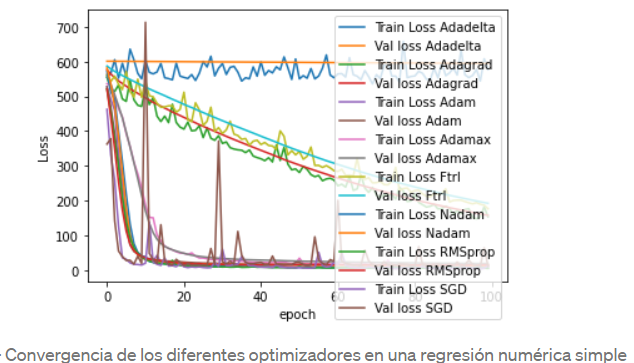

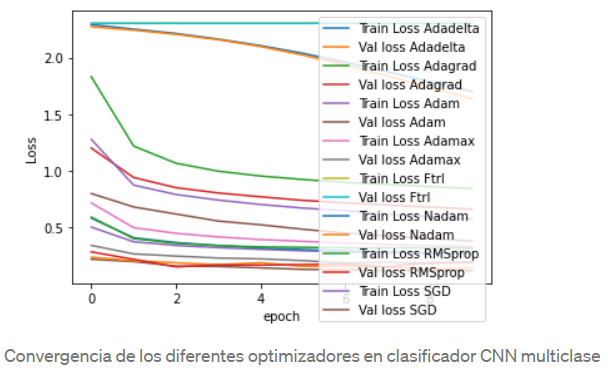

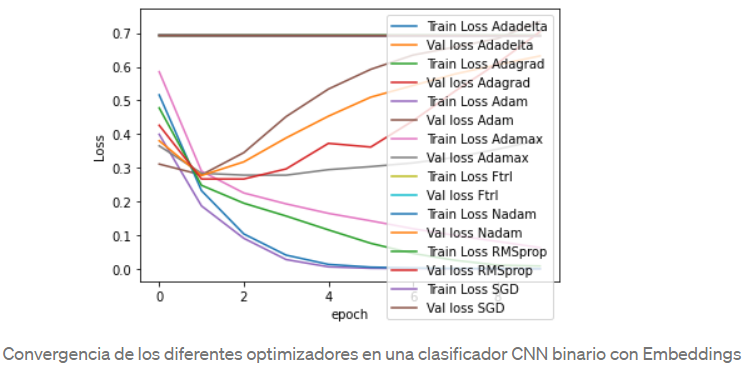

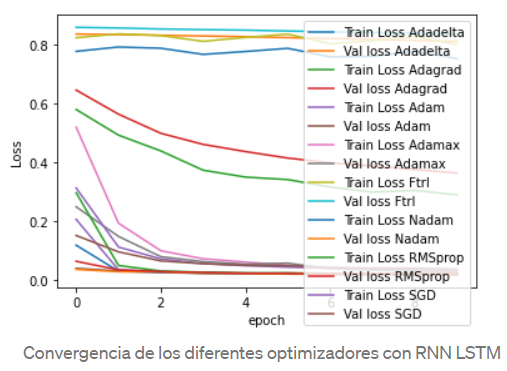

En conclusión, podemos observar (de una forma empírica) cómo quizás el **algoritmo Adam** presenta un comportamiento adecuado en diferentes problemas, por tanto puede ser un **buen candidato para empezar a probar en nuestros modelos**.

# Referencias y Recursos

*   https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
*   https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback
*   https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
*   https://lazypredict.readthedocs.io/en/latest/index.html
*   https://velascoluis.medium.com/optimizadores-en-redes-neuronales-profundas-un-enfoque-pr%C3%A1ctico-819b39a3eb5

